<a href="https://colab.research.google.com/github/LorenzoMauri/Advanced-Machine-Learning/blob/main/Copy_of_shared.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image automatic orientation detection
Task: 4 classes.

Classify if an image is correctly oriented (0°) or not
(affected by 90°, 180° or 270° orientation).


In [3]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)
root_dir = '/content'
model_dir = root_dir + '/drive/My Drive/2021-2-F1801Q151/models'
data_dir = root_dir + '/drive/My Drive/2021-2-F1801Q151/datasets'
indoor_dir = data_dir + '/indoor-scenes-cvpr-2019'
sun_dir = data_dir + '/SUN397/partition_01'
local_indoor_dir = root_dir + '/indoor-scenes-cvpr-2019'
local_sun_dir = root_dir + '/SUN397_partition_01'

%pwd

Mounted at /content/drive


'/content'

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import

In [4]:
import os
import tarfile
from time import time
from shutil import copyfile

import matplotlib.pylab as plt
import numpy as np

import tensorflow as tf
import tensorflow_datasets as tfds

print('TF version:', tf.__version__)
print('GPU: ', tf.config.list_physical_devices('GPU'))

TF version: 2.4.1
GPU:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [5]:
from time import time
from shutil import copyfile
import tarfile

def createFolder(name) :
  if not os.path.exists(name):
    os.mkdir(name)

## Generate indoorCVPR_09 dataset

In [ ]:
# Train, Validation
path = indoor_dir + '/TrainImages.txt'

train_image_paths = []
with open(path, mode='r') as train_images:
  lines = train_images.readlines()
  for l in lines:
    train_image_paths.append(l.replace('\n',''))

In [ ]:
# Test
path = indoor_dir + '/TestImages.txt'

test_image_paths = []
with open(path, mode='r') as test_images:
  lines = test_images.readlines()
  for l in lines:
    test_image_paths.append(l.replace('\n',''))

In [ ]:
# Train, Validation
rotated_dataset = root_dir + '/RotatedImages'
createFolder(rotated_dataset)
for name in [0, 90, 180, 270]:
  createFolder(rotated_dataset + '/{}'.format(name))

In [ ]:
# Test
rotated_test_dataset = root_dir + '/RotatedTestImages'
createFolder(rotated_test_dataset)
for name in [0, 90, 180, 270]:
  createFolder(rotated_test_dataset + '/{}'.format(name))

In [ ]:
t0 = time()
# Link Google Drive account, transfer original dataset, and extract files
ds_source = indoor_dir + '/indoorCVPR_09.tar'
ds_destination = root_dir + '/indoorCVPR_09.tar'
copyfile(ds_source, ds_destination)
print('File transfer completed in %0.3f seconds' % (time() - t0))
tar = tarfile.open(ds_destination)
tar.extractall()
tar.close()
os.remove(ds_destination)
print('Original dataset transfer completed in %0.3f seconds' % (time() - t0))

Original dataset transfer completed in 166.470 seconds


In [ ]:
from PIL import Image

new_width = 224
new_height = 224
new_dim = (new_width, new_height)
RESAMPLE = Image.BICUBIC
ROTATE = [Image.ROTATE_90, Image.ROTATE_180, Image.ROTATE_270]

In [ ]:
t0 = time()
# Train, Validation
for image_path in train_image_paths:
  original_image = Image.open('Images/' + image_path, mode = 'r')
  image_name = image_path.split('/')[1]
  
  for i, angle in enumerate([0, 90, 180, 270]):
    final_image = original_image.resize(size = new_dim, resample = RESAMPLE, box = None) # reducing_gap = 3
    if i != 0:
      final_image = final_image.transpose(method = ROTATE[i - 1]) # final_image.rotate(angle, expand = True)
    if final_image.mode != 'RGB': # images are converted to have 3 channels
      final_image = final_image.convert('RGB')
    final_image.save('RotatedImages/{}/'.format(angle) + image_name)
print('Rotation of train set completed in %0.3f seconds' % (time() - t0))

Rotation of train set completed in 142.025 seconds


In [ ]:
t0 = time()
# Test
for image_path in test_image_paths:
  original_image = Image.open('Images/' + image_path, mode = 'r')
  image_name = image_path.split('/')[1]
  
  for i, angle in enumerate([0, 90, 180, 270]):
    final_image = original_image.resize(size = new_dim, resample = resample, box = None) # reducing_gap = 3
    if i != 0:
      final_image = final_image.transpose(method = rotation_method[i - 1]) # final_image.rotate(angle, expand = True)
    if final_image.mode != 'RGB': # images are converted to have 3 channels
      final_image = final_image.convert('RGB')
    final_image.save('RotatedTestImages/{}/'.format(angle) + image_name)
print('Rotation of test set completed in %0.3f seconds' % (time() - t0))

Rotation of test set completed in 37.887 seconds


## Transfer indoorCVPR_09 to Google Drive

In [ ]:
# Link Google Drive account, transfer original dataset
t0 = time()
original_ds_source = 'Images.tar'
tar = tarfile.open(original_ds_source, 'w')
tar.add('Images')
tar.close()
original_ds_destination = indoor_dir + '/indoorCVPR_09/Images.tar'
copyfile(original_ds_source, original_ds_destination)
os.remove(original_ds_source)
print('File transfer completed in %0.3f seconds' % (time() - t0))

File transfer completed in 111.873 seconds


In [ ]:
# Link Google Drive account, transfer train dataset
t0 = time() 
train_ds_source = 'RotatedImages.tar'
tar = tarfile.open(train_ds_source, 'w')
tar.add('RotatedImages')
tar.close()
train_ds_destination = indoor_dir + '/indoorCVPR_09/RotatedImages.tar'
copyfile(train_ds_source, train_ds_destination)
os.remove(train_ds_source)
print('File transfer completed in %0.3f seconds' % (time() - t0))

File transfer completed in 26.368 seconds


In [ ]:
# Link Google Drive account, transfer test dataset
t0 = time()
test_ds_source = 'RotatedTestImages.tar'
tar = tarfile.open(test_ds_source, 'w')
tar.add('RotatedTestImages')
tar.close()
test_ds_destination = indoor_dir + '/indoorCVPR_09/RotatedTestImages.tar'
copyfile(test_ds_source, test_ds_destination)
os.remove(test_ds_source)
print('File transfer completed in %0.3f seconds' % (time() - t0))

File transfer completed in 7.667 seconds


## Transfer datasets from Google Drive

In [ ]:
createFolder(local_indoor_dir)
createFolder(local_sun_dir)

In [ ]:
# Link Google Drive account, transfer 'indoor' train dataset, and extract files
t0 = time() 
train_ds_source = indoor_dir + '/indoorCVPR_09/RotatedImages.tar'
train_ds_destination = local_indoor_dir + '/RotatedImages.tar'

copyfile(train_ds_source, train_ds_destination)
print('File transfer completed in %0.3f seconds' % (time() - t0))

%cd $local_indoor_dir
!tar -xf $train_ds_destination 
%cd $root_dir
os.remove(train_ds_destination)
print('File extraction completed in %0.3f seconds' % (time() - t0))

File transfer completed in 3.252 seconds
/content/indoor-scenes-cvpr-2019
/content
File extraction completed in 4.856 seconds


In [ ]:
# Link Google Drive account, transfer 'indoor' test dataset, and extract files
t0 = time()
test_ds_source = indoor_dir + '/indoorCVPR_09/RotatedTestImages.tar'
test_ds_destination = local_indoor_dir + '/RotatedTestImages.tar'

copyfile(test_ds_source, test_ds_destination)
print('File transfer completed in %0.3f seconds' % (time() - t0))

%cd $local_indoor_dir
!tar -xf $test_ds_destination
%cd $root_dir
os.remove(test_ds_destination)
print('File extraction completed in %0.3f seconds' % (time() - t0))

File transfer completed in 0.842 seconds
/content/indoor-scenes-cvpr-2019
/content
File extraction completed in 1.278 seconds


In [ ]:
# Link Google Drive account, transfer 'sun' train dataset, and extract files
t0 = time()
train_ds_source = sun_dir + '/RotatedImages_224.tar' # partition 01 resized
train_ds_destination = local_sun_dir + '/RotatedImages_224.tar'

copyfile(train_ds_source, train_ds_destination)
print('File transfer completed in %0.3f seconds' % (time() - t0))

%cd $local_sun_dir
!tar -xf $train_ds_destination
%cd $root_dir
os.remove(train_ds_destination)
print('File extraction completed in %0.3f seconds' % (time() - t0))

File transfer completed in 38.613 seconds
/content/SUN397_partition_01
/content
File extraction completed in 64.080 seconds


In [ ]:
# Link Google Drive account, transfer 'sun' test dataset, and extract files
t0 = time()
test_ds_source = sun_dir + '/RotatedTestImages_224.tar'
test_ds_destination = local_sun_dir + '/RotatedTestImages_224.tar'

copyfile(test_ds_source, test_ds_destination)
print('File transfer completed in %0.3f seconds' % (time() - t0))

%cd $local_sun_dir
!tar -xf $test_ds_destination
%cd $root_dir
os.remove(test_ds_destination)
print('File extraction completed in %0.3f seconds' % (time() - t0))

File transfer completed in 50.660 seconds
/content/SUN397_partition_01
/content
File extraction completed in 76.208 seconds


## Load datasets

In [6]:
indoor_train_dir = local_indoor_dir + '/RotatedImages'
indoor_test_dir = local_indoor_dir + '/RotatedTestImages'
sun_train_dir = local_sun_dir + '/RotatedImages_224'
sun_test_dir = local_sun_dir + '/RotatedTestImages_224'

LABELS = 'inferred'
LABEL_MODE = 'int'
CLASS_NAMES = ['0','90','180','270']
COLOR_MODE = 'rgb'
BATCH_SIZE = 128
IMAGE_SIZE = (224, 224) # Xception (299, 299)
SEED = 4321
VALIDATION_SPLIT = 0.2
INTERPOLATION = 'bicubic'

### indoorCVPR_09

In [7]:
# Train
indoor_train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    indoor_train_dir,
    labels=LABELS,
    label_mode=LABEL_MODE,
    class_names=CLASS_NAMES,
    color_mode=COLOR_MODE,
    batch_size=BATCH_SIZE,
    image_size=IMAGE_SIZE,
    shuffle=True,
    seed=SEED,
    validation_split=VALIDATION_SPLIT,
    subset='training',
    interpolation=INTERPOLATION,
    follow_links=False,
)

# Validation
indoor_validation_ds = tf.keras.preprocessing.image_dataset_from_directory(
    indoor_train_dir,
    labels=LABELS,
    label_mode=LABEL_MODE,
    class_names=CLASS_NAMES,
    color_mode=COLOR_MODE,
    batch_size=BATCH_SIZE,
    image_size=IMAGE_SIZE,
    shuffle=True,
    seed=SEED,
    validation_split=VALIDATION_SPLIT,
    subset='validation',
    interpolation=INTERPOLATION,
    follow_links=False,
)

FileNotFoundError: ignored

In [ ]:
# Test
indoor_test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    indoor_test_dir,
    labels=LABELS,
    label_mode=LABEL_MODE,
    class_names=CLASS_NAMES,
    color_mode=COLOR_MODE,
    batch_size=BATCH_SIZE,
    image_size=IMAGE_SIZE,
    shuffle=True,
    seed=SEED,
    validation_split=None,
    subset=None,
    interpolation=INTERPOLATION,
    follow_links=False,
)

Found 5352 files belonging to 4 classes.


In [ ]:
assert isinstance(indoor_train_ds, tf.data.Dataset)
print('Number of train batches: %d' % tf.data.experimental.cardinality(indoor_train_ds))
assert isinstance(indoor_validation_ds, tf.data.Dataset)
print('Number of validation batches: %d' % tf.data.experimental.cardinality(indoor_validation_ds))
assert isinstance(indoor_test_ds, tf.data.Dataset)
print('Number of test batches: %d' % tf.data.experimental.cardinality(indoor_test_ds))

Number of train batches: 134
Number of validation batches: 34
Number of test batches: 42


### SUN397 partition 01

In [ ]:
# Train
sun_train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    sun_train_dir,
    labels=LABELS,
    label_mode=LABEL_MODE,
    class_names=CLASS_NAMES,
    color_mode=COLOR_MODE,
    batch_size=BATCH_SIZE,
    image_size=IMAGE_SIZE,
    shuffle=True,
    seed=SEED,
    validation_split=VALIDATION_SPLIT,
    subset='training',
    interpolation=INTERPOLATION,
    follow_links=False,
)

# Validation
sun_validation_ds = tf.keras.preprocessing.image_dataset_from_directory(
    sun_train_dir,
    labels=LABELS,
    label_mode=LABEL_MODE,
    class_names=CLASS_NAMES,
    color_mode=COLOR_MODE,
    batch_size=BATCH_SIZE,
    image_size=IMAGE_SIZE,
    shuffle=True,
    seed=SEED,
    validation_split=VALIDATION_SPLIT,
    subset='validation',
    interpolation=INTERPOLATION,
    follow_links=False,
)

Found 79400 files belonging to 4 classes.
Using 63520 files for training.
Found 79400 files belonging to 4 classes.
Using 15880 files for validation.


In [ ]:
# Test
sun_test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    sun_test_dir,
    labels=LABELS,
    label_mode=LABEL_MODE,
    class_names=CLASS_NAMES,
    color_mode=COLOR_MODE,
    batch_size=BATCH_SIZE,
    image_size=IMAGE_SIZE,
    shuffle=True,
    seed=SEED,
    validation_split=None,
    subset=None,
    interpolation=INTERPOLATION,
    follow_links=False,
)

Found 79400 files belonging to 4 classes.


In [ ]:
assert isinstance(sun_train_ds, tf.data.Dataset)
print('Number of train batches: %d' % tf.data.experimental.cardinality(sun_train_ds))
assert isinstance(sun_validation_ds, tf.data.Dataset)
print('Number of validation batches: %d' % tf.data.experimental.cardinality(sun_validation_ds))
assert isinstance(sun_test_ds, tf.data.Dataset)
print('Number of test batches: %d' % tf.data.experimental.cardinality(sun_test_ds))

Number of train batches: 497
Number of validation batches: 125
Number of test batches: 621


## Merge datasets

In [ ]:
class_names = indoor_train_ds.class_names
num_classes = len(class_names)

In [ ]:
# Concatenate indoorCVPR09 and SUN397 partition 01 datasets
train_ds = indoor_train_ds.concatenate(sun_train_ds)
validation_ds = indoor_validation_ds.concatenate(sun_validation_ds)
test_ds = indoor_test_ds.concatenate(sun_test_ds)

In [ ]:
'''
SEED = 42
train_ds = tf.data.experimental.sample_from_datasets(datasets = [indoor_train_ds, sun_train_ds], weights = [1, 0.5], seed = SEED)
validation_ds = tf.data.experimental.sample_from_datasets(datasets = [indoor_validation_ds, sun_validation_ds], weights = [1, 0.5], seed = SEED)
test_ds = tf.data.experimental.sample_from_datasets(datasets = [indoor_test_ds, sun_test_ds], weights = [1, 0.5], seed = SEED)
'''

'\nSEED = 42\ntrain_ds = tf.data.experimental.sample_from_datasets(datasets = [indoor_train_ds, sun_train_ds], weights = [1, 0.5], seed = SEED)\nvalidation_ds = tf.data.experimental.sample_from_datasets(datasets = [indoor_validation_ds, sun_validation_ds], weights = [1, 0.5], seed = SEED)\ntest_ds = tf.data.experimental.sample_from_datasets(datasets = [indoor_test_ds, sun_test_ds], weights = [1, 0.5], seed = SEED)\n'

In [ ]:
assert isinstance(train_ds, tf.data.Dataset)
print('Number of train batches: %d' % tf.data.experimental.cardinality(train_ds))
assert isinstance(validation_ds, tf.data.Dataset)
print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_ds))
assert isinstance(test_ds, tf.data.Dataset)
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_ds))

Number of train batches: 631
Number of validation batches: 159
Number of test batches: 663


## Visualize images

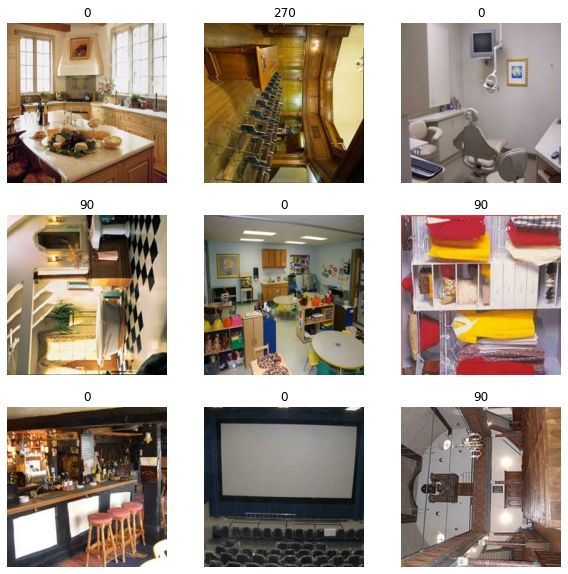

In [ ]:
# Show the first nine images and labels from the training set

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis('off')

## Label extraction

In [ ]:
#y_train = np.concatenate([labels for images, labels in train_ds.as_numpy_iterator()], axis=0)
#y_validation = np.concatenate([labels for images, labels in validation_ds.as_numpy_iterator()], axis=0)
#y_test = np.concatenate([labels for images, labels in test_ds.as_numpy_iterator()], axis=0)

## Build base model

In [ ]:
from tensorflow.keras.models import Model

vgg16 = tf.keras.applications.VGG16(include_top=True, weights='imagenet')
#xception = tf.keras.applications.Xception(include_top=True, weights='imagenet')

553467904/553467096 [==============================] - 4s 0us/step


In [ ]:
# Let's take a look at the models architecture
vgg16.summary()
#xception.summary()

In [ ]:
# Cut VGG16 at layer'fc2 (Dense) (None, 4096)'
base_model = Model(inputs=vgg16.input, outputs=vgg16.get_layer('fc2').output)
#base_model = Model(inputs=, outputs=)

"\nbase_model = tf.keras.applications.Xception(\n    weights='imagenet',  # Load weights pre-trained on ImageNet.\n    input_shape=(image_size + (3,)),\n    include_top=False)  # Do not include the ImageNet classifier at the top.\n"

In [ ]:
# Freeze the convolutional base
base_model.trainable = False

In [ ]:
#layers = [l for l in base_model.layers]
#layers

In [ ]:
'''
num_classes = len(class_names)
inputs = tf.keras.Input(shape=image_size+(3,))
x = layers[1](inputs)
# block_1
for i in range(2, 4):
  x = layers[i](x)
# block_2
for i in range(4, 7):
  x = layers[i](x)
# block_3
for i in range(7, 11):
  x = layers[i](x)
# block_4
for i in range(11, 15):
  x = layers[i](x)
x = tf.keras.layers.Dropout(0.15)(x)
# block_5
for i in range(15, 19):
  x = layers[i](x)
x = tf.keras.layers.Dropout(0.15)(x)
# flatten
x = layers[19](x)
# fc1
x = layers[20](x)
x = tf.keras.layers.Dropout(0.25)(x)
# fc2
x = layers[21](x)
x = tf.keras.layers.Dropout(0.25)(x)
# classifier
outputs = tf.keras.layers.Dense(num_classes)(x)#, activation='softmax'
model = tf.keras.Model(inputs, outputs)
'''

In [ ]:
# Build feature extractor that converts each 224x224x3 image into a 4096 vector of features.
# Apply a tf.keras.layers.Dense layer to convert these features into a single prediction per image.
inputs = tf.keras.Input(shape = IMAGE_SIZE + (3, ))  # channels_last data format
x = base_model(inputs, training = False)
#x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.5)(x) # to prevent overfitting
outputs = tf.keras.layers.Dense(num_classes)(x)
model = tf.keras.Model(inputs, outputs)

#del base_model

In [ ]:
'''
inputs = tf.keras.Input(shape=(image_size + (3,)))
x = base_model(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
#x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dropout(0.3)(x)
outputs = tf.keras.layers.Dense(num_classes)(x)
model = tf.keras.Model(inputs, outputs)
'''

'\ninputs = tf.keras.Input(shape=(image_size + (3,)))\nx = base_model(inputs, training=False)\nx = tf.keras.layers.GlobalAveragePooling2D()(x)\n#x = tf.keras.layers.Flatten()(x)\nx = tf.keras.layers.Dropout(0.3)(x)\noutputs = tf.keras.layers.Dense(num_classes)(x)\nmodel = tf.keras.Model(inputs, outputs)\n'

In [ ]:
# Compile the model
base_learning_rate = 1e-4
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
model (Functional)           (None, 4096)              134260544 
_________________________________________________________________
dropout (Dropout)            (None, 4096)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 16388     
Total params: 134,276,932
Trainable params: 16,388
Non-trainable params: 134,260,544
_________________________________________________________________


## Preprocess dataset for both VGG16 and performance

In [ ]:
vgg16_preprocess_input = tf.keras.applications.vgg16.preprocess_input
#xception_preprocess_input = tf.keras.applications.xception.preprocess_input

preprocess_input = vgg16_preprocess_input
# VGG16 expects a specific kind of input preprocessing
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.map(lambda x, y: (preprocess_input(x), y), num_parallel_calls=AUTOTUNE)
validation_ds = validation_ds.map(lambda x, y: (preprocess_input(x), y), num_parallel_calls=AUTOTUNE)
test_ds = test_ds.map(lambda x, y: (preprocess_input(x), y), num_parallel_calls=AUTOTUNE)

In [ ]:
# Configure the dataset for performance
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
validation_ds = validation_ds.prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)

## Train the top layer

In [ ]:
# Accuracy on the validation set before training
val_loss, val_acc = model.evaluate(validation_ds)

159/159 [==============================] - 161s 897ms/step - loss: 2.0801 - sparse_categorical_accuracy: 0.2553


In [ ]:
# Train the model
initial_epochs = 5
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
history = model.fit(train_ds,
                    epochs=initial_epochs,
                    callbacks=[callback],
                    validation_data=validation_ds)

Epoch 1/5
631/631 [==============================] - 791s 1s/step - loss: 1.9917 - sparse_categorical_accuracy: 0.4281 - val_loss: 0.8307 - val_sparse_categorical_accuracy: 0.6295
Epoch 2/5
631/631 [==============================] - 759s 1s/step - loss: 1.1935 - sparse_categorical_accuracy: 0.5737 - val_loss: 0.7285 - val_sparse_categorical_accuracy: 0.6650
Epoch 3/5
631/631 [==============================] - 743s 1s/step - loss: 0.9883 - sparse_categorical_accuracy: 0.6092 - val_loss: 0.6829 - val_sparse_categorical_accuracy: 0.6881
Epoch 4/5
631/631 [==============================] - 737s 1s/step - loss: 0.8675 - sparse_categorical_accuracy: 0.6330 - val_loss: 0.6563 - val_sparse_categorical_accuracy: 0.7003
Epoch 5/5
631/631 [==============================] - 752s 1s/step - loss: 0.7916 - sparse_categorical_accuracy: 0.6553 - val_loss: 0.6418 - val_sparse_categorical_accuracy: 0.7069


In [ ]:
# Learning curves using the base model as a fixed feature extractor
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.5])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.savefig('VGG16_indoor_top_1_dropout_0_gblavg_0_softmax_1_scce_loss_1_logits.pdf')
plt.show()

In [ ]:
# save model and architecture to single file
%cd $model_dir
model.save('model.h5')
print('Saved model to disk')
%cd $model_dir

In [ ]:
#del model
#tf.keras.backend.clear_session()

In [ ]:
from keras.models import load_model

%cd $model_dir
# load model
model = load_model('model.h5')
# summarize model
model.summary()
%cd $model_dir

In [ ]:
'''from keras.models import model_from_json

%cd $model_dir
# serialize model to JSON
model_json = model.to_json()
with open('model.json', 'w') as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights('model.h5')
print('Saved model to disk')
%cd $model_dir

%cd $model_dir
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights('model.h5')
print('Loaded model from disk')
%cd $model_dir
# compile loaded model'''

In [ ]:
'''loaded_model.compile(optimizer = tf.keras.optimizers.Adam(lr = base_learning_rate),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = [tf.keras.metrics.SparseCategoricalAccuracy()])
val_loss, val_acc = loaded_model.evaluate(validation_ds)
model = loaded_model'''

In [ ]:
# Test the model
test_loss, test_accuracy = model.evaluate(test_ds)

## Do a round of fine-tuning

In [ ]:
# Let's unfreeze the base model
model.trainable = True

In [ ]:
# Let's take a look to see how many layers are in the base model
print('Number of layers in the base model: ', len(model.layers))

Number of layers in the base model:  4


In [ ]:
'''# Fine-tune from this layer onwards
# 16 # block5_conv1 (Conv2D) (None, 14, 14, 512) 2359808
# 21 # fc1 (Dense) (None, 4096) 102764544
# 22 # fc2 (Dense) (None, 4096) 16781312
fine_tune_at = 16 # block5_conv1 (Conv2D) (None, 14, 14, 512) 2359808

# Freeze all the layers before the 'fine_tune_at' layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False
  '''

In [ ]:
# Re-training the model end-to-end with a very low learning rate
model.compile(optimizer = tf.keras.optimizers.Adam(lr=1e-7), # vs lr=1e-4
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = [tf.keras.metrics.SparseCategoricalAccuracy()])

In [ ]:
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
model_2 (Functional)         (None, 4096)              134260544 
_________________________________________________________________
dropout_1 (Dropout)          (None, 4096)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 16388     
Total params: 134,276,932
Trainable params: 134,276,932
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Continue training the model
# Be careful to stop before overfit!
fine_tune_epochs = 1
total_epochs =  initial_epochs + fine_tune_epochs
callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 2, restore_best_weights = True)

history_fine = model.fit(train_ds,
                         epochs=total_epochs,
                         callbacks=[callback],
                         validation_data=validation_ds,
                         initial_epoch=history.epoch[-1],
                         )

Epoch 10/11
105/631 [===>..........................] - ETA: 16:31 - loss: 0.6593 - sparse_categorical_accuracy: 0.6984

In [ ]:
acc += history_fine.history['sparse_categorical_accuracy']
val_acc += history_fine.history['val_sparse_categorical_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

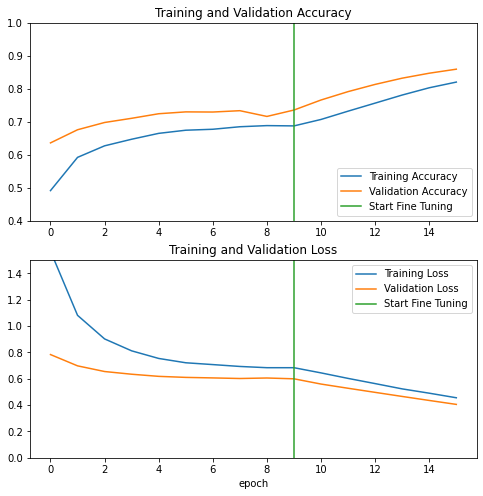

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.4, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.5])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.savefig('VGG16_indoor_fine-tuning.pdf')
plt.show()

In [ ]:
# Evaluation and prediction
final_loss, final_accuracy = model.evaluate(test_ds)

42/42 [==============================] - 32s 655ms/step - loss: 0.4496 - sparse_categorical_accuracy: 0.8464


In [ ]:
# save model and architecture to single file
%cd $model_dir
model.save('model_fine_tuned.h5')
print('Saved fine-tuned model to disk')
%cd $model_dir

In [ ]:
#del base_model
#tf.keras.backend.clear_session()